In [3]:
# # Analysis of harmonics
# 
# The idea behind this script is to explore the data series for seasonal trends, using a 
# fourier decomposition of the time series, aggregated by climatic seasons (resampled and sliced 
# every 3 months).
# 
# The analysis goes as follows:
# 
# - Loading the data
# - Filling the gaps
# - Resampling at different scales (3 months, 6 months, 1 and 4 years)
# - Slicing the data by seasons
# - Applying the Fourier transform over each of the seasonal data
# - Filtering out minor frequencies (below 500 in the power spectrum)
# - Recomposing the original series only with the major frequency
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft
import os

In [142]:
os.chdir("/Users/cseveriano/spatio-temporal-forecasting/")

fln_df = pd.read_csv('data/processed/SONDA/FLN-15min.csv', sep=";", parse_dates=['date'], index_col='date')

# Fill the gaps in the series
fln_df = fln_df.fillna(method='ffill')

In [213]:
fln_df = fln_df[(fln_df.index >= '2013-11-01') & (fln_df.index <= '2014-11-01')]

In [143]:
fln_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 75936 entries, 2013-11-01 00:00:00 to 2015-12-31 23:45:00
Data columns (total 10 columns):
glo_avg     75936 non-null float64
dir_avg     75936 non-null float64
diff_avg    75936 non-null float64
lw_avg      75936 non-null float64
tp_sfc      75936 non-null float64
humid       75936 non-null float64
press       75936 non-null float64
rain        75936 non-null float64
ws_10m      74734 non-null float64
wd_10m      74734 non-null float64
dtypes: float64(10)
memory usage: 6.4 MB


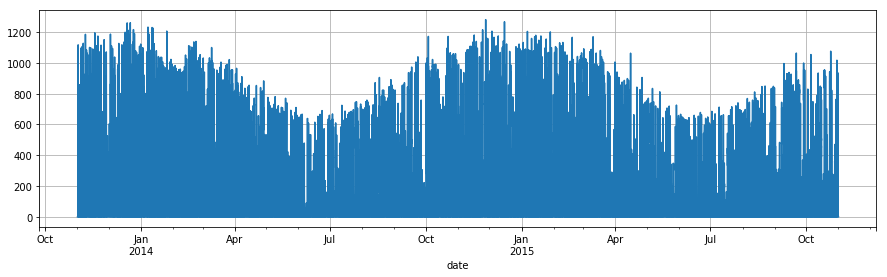

In [145]:
# Plot initial data
plt.figure(figsize=(15,4))
fln_df['glo_avg'].plot()
plt.grid()
plt.show()

plt.figure(figsize=(15,16))

## Data resampling
# Resample the series and visualise at different scales

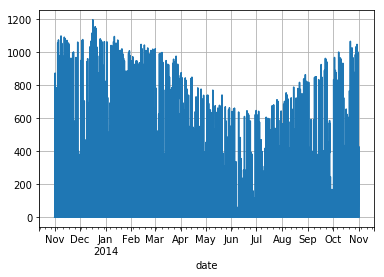

In [214]:
# Hourly
hour_temp = fln_df.resample('H').mean()

hour_temp['glo_avg'].plot()
plt.grid()


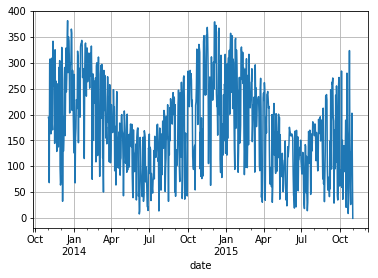

In [163]:
# Daily
day_temp = fln_df.resample('D').mean()

day_temp['glo_avg'].plot()
plt.grid()


## Explore autocorrelation of the time series (at monthly scale)
## explore the autocorrelation of global radiance data

In [215]:
rad = np.array(hour_temp['glo_avg'])

In [216]:
# detrend the seasonal data by removing the average
det_rad = rad - np.average(rad)


In [201]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import acovf  

acv_rad = acovf(det_rad)
acf_rad = acf(det_rad)

In [174]:
acv_rad

array([  7.82332064e+03,   4.39315333e+03,   3.17723340e+03,
         2.88628667e+03,   2.71780037e+03,   2.90300143e+03,
         2.93624448e+03,   2.72050583e+03,   2.40521682e+03,
         2.50057970e+03,   2.42878831e+03,   2.36707434e+03,
         2.38642300e+03,   2.59448608e+03,   2.49317769e+03,
         2.52666721e+03,   2.48870781e+03,   2.67249551e+03,
         2.66918544e+03,   2.68568976e+03,   2.55786504e+03,
         2.60339007e+03,   2.62309512e+03,   2.47460127e+03,
         2.50897773e+03,   2.64172496e+03,   2.42644213e+03,
         2.31112623e+03,   2.22304862e+03,   2.01641846e+03,
         2.30392979e+03,   2.31752671e+03,   2.33666018e+03,
         2.10275013e+03,   2.21756339e+03,   2.44184259e+03,
         2.34186269e+03,   2.32571991e+03,   2.54601260e+03,
         2.25505514e+03,   2.42226655e+03,   2.46814581e+03,
         2.41560857e+03,   2.14739294e+03,   2.25180903e+03,
         2.03172183e+03,   1.74896590e+03,   1.55068229e+03,
         1.68962400e+03,

## Do the regression analysis

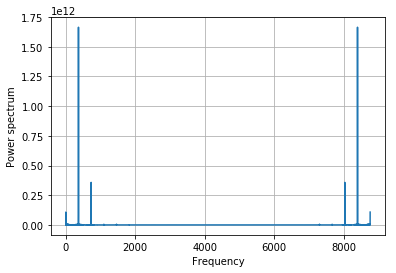

In [217]:
# Get the fourier coefficients
#rad = np.array(hour_temp['glo_avg'])
det_rad_fft = fft(det_rad)

# Get the power spectrum
rad_ps = [np.abs(rd)**2 for rd in det_rad_fft]

#plt.subplot(2,1,2)
plt.plot(range(len(rad_ps)), rad_ps)
plt.xlabel('Frequency')
plt.ylabel('Power spectrum')
#plt.xlim([0, 30])
plt.grid()
plt.show()


In [218]:
greatest = [j for i, j in enumerate(rad_ps) if j > 0.1e12]
(sum(greatest) / sum(rad_ps)) * 100


71.952717251017489

In [139]:
rad_ps

[41533164608425.016,
 1727656691715.6909,
 65174087638.558708,
 4930766510.8059883,
 53010536389.772835,
 12025044424.466644,
 2328640865.7696509,
 59418017426.867294,
 53209633108.619118,
 49898604533.917503,
 55690694504.978157,
 12337768602.440622,
 22499764326.649818,
 8997151880.7021027,
 28436683851.798939,
 38280448168.052155,
 18087620220.085869,
 26059819032.584522,
 137224060261.98065,
 21800359389.185741,
 23307219272.853073,
 5718488233.0562696,
 64381169831.852615,
 33867268168.378826,
 7752120679.9300547,
 13288063829.166744,
 27824399197.350826,
 14082667687.724949,
 5498091661.6415577,
 2694389525.4686203,
 15964419357.493082,
 38637174274.939697,
 10115235076.720919,
 36398647201.670944,
 31156232543.767601,
 1921224004.9484746,
 3462025819.9926095,
 15967799063.360682,
 12432404072.093288,
 50741616266.041756,
 12568261813.485485,
 2562421944.825253,
 55425763470.202393,
 22865183794.827862,
 15466325032.807442,
 1133736340.5987809,
 64959814079.831993,
 10043665433.2

In [219]:
# # Filter frequencies in the low part of the power spectrum and re-construct the series
# 
# A filter in the value of 500 of the power spectrum was set. In other words, if the value 
# of the power spectrum is below this threshold, it will be set to 0. this will allow to focus 
# on the signal of the data, instead that in the fluctuations that comes from the randomness of 
# the process and the measurements.
# 
# The selection of the 500 threshold was arbitrary and of course is open for debate.
## Clean each of the time series in the seasons by selecting such that the power spectrum is higher than 500

clean_rad_fft = [det_rad_fft[i] if rad_ps[i] > 0.1e12 else 0 
                     for i in range(len(det_rad_fft))]



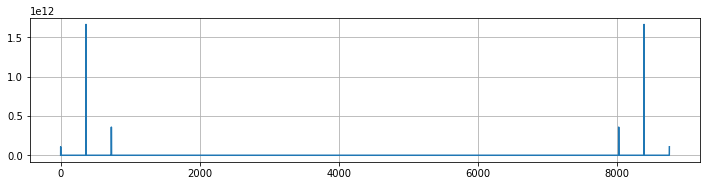

In [220]:
clean_rad_ps = [rad_ps[i] if rad_ps[i] > 0.1e12 else 0 
                     for i in range(len(rad_ps))]

plt.figure(figsize=[12,9])
plt.subplot(3,1,1)
plt.plot(np.transpose(clean_rad_ps))
#plt.xlim([0, 30])
plt.grid()

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


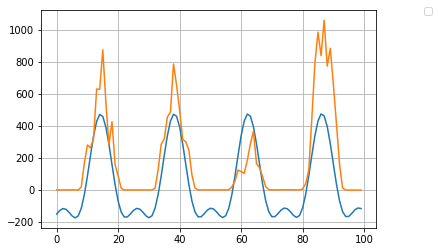

In [221]:
## redraw the series only with significant harmonics
rad_series_clean = ifft(clean_rad_fft)

plt.plot(rad_series_clean[0:100])
plt.plot(rad[0:100])

plt.legend(bbox_to_anchor=(1.18, 1.04))
plt.grid()

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


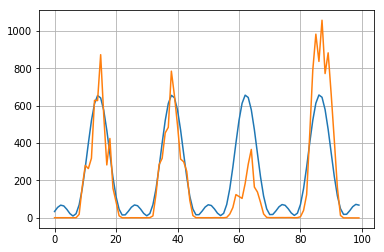

In [245]:
## put the trend back into the dataset
rad_trends = rad_series_clean + np.average(rad)

plt.plot(rad_trends[0:100])
plt.plot(rad[0:100])

plt.grid()
plt.show()

In [246]:
del(rad_clean_ts)
rad_clean_ts = pd.Series(rad_trends, index=hour_temp.index)



In [247]:
rad_clean_ts[(rad_clean_ts.index.hour < 6) | (rad_clean_ts.index.hour > 20)] = 0

/Users/cseveriano/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


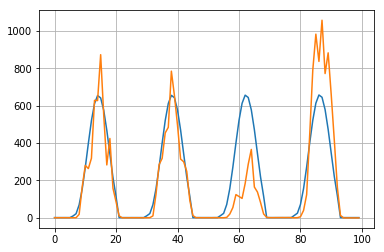

In [248]:
plt.plot(rad_clean_ts[0:100].values)
plt.plot(rad[0:100])

plt.grid()
plt.show()

## Correlation Test

In [212]:
fln_df = fln_df[(fln_df.index >= '2013-11-01') & (fln_df.index <= '2014-11-01')]
fln_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2013-11-01 00:00:00 to 2014-11-01 00:00:00
Data columns (total 10 columns):
glo_avg     35041 non-null float64
dir_avg     35041 non-null float64
diff_avg    35041 non-null float64
lw_avg      35041 non-null float64
tp_sfc      35041 non-null float64
humid       35041 non-null float64
press       35041 non-null float64
rain        35041 non-null float64
ws_10m      33839 non-null float64
wd_10m      33839 non-null float64
dtypes: float64(10)
memory usage: 2.9 MB


In [ ]:
joi_df = pd.read_csv('data/processed/SONDA/JOI-15min.csv', sep=";", parse_dates=['date'], index_col='date')

# Fill the gaps in the series
joi_df = joi_df.fillna(method='ffill')

joi_df = joi_df[(fln_df.index >= '2013-11-01') & (joi_df.index <= '2014-11-01')]